In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from solvers import util


In [87]:
drones_3_7_combined= pd.read_excel('ADMM_mpc_3_to_7_agents.xlsm', sheet_name='Sheet1')

In [88]:
drones_3_7_combined.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', 'Distributed ADMM', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [89]:
drones_3_7_combined= drones_3_7_combined.replace(to_replace='None', value=np.nan).dropna()

In [90]:
drones_3_7_combined = drones_3_7_combined.dropna()

In [93]:
drones_3_7_combined.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', 'Distributed ADMM', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [94]:
drones_3_7_combined.tail()

,i_trial,n_agents,t,converged,obj_trj,T,dt,radius,Distributed ADMM,t_solve_avg,t_solve_std,MAX_ITER,dist_to_goal
295,47,7,3.6,False,3419.292048,8,0.1,0.3,True,0.365640,0.129076,3,[0.162 0.075 0.158 0.095 0.049 0.032 0.114]
296,48,7,3.6,False,2853.673611,8,0.1,0.3,False,5.175303,0.891079,3,[0.033 0.024 0.026 0.056 0.064 0.099 0.101]
297,48,7,1.6,True,1576.813193,8,0.1,0.3,True,0.345129,0.102626,3,[0.048 0.031 0.068 0.041 0.076 0.082 0.087]
298,49,7,1.5,True,1517.804776,8,0.1,0.3,False,6.166971,1.290226,3,[0.097 0.093 0.069 0.08 0.021 0.024 0.083]
299,49,7,1.5,True,1503.341503,8,0.1,0.3,True,0.323422,0.071051,3,[0.097 0.093 0.056 0.066 0.026 0.025 0.083]


In [34]:
# drones_3_8_combined['normalized_t_solve'] = drones_3_8_combined['t_solve_avg']/drones_3_8_combined['obj_trj']
# drones_3_8_combined['normalized_t_solve'] = np.log(drones_3_8_combined['t_solve_avg'])

/tmp/ipykernel_436/2845598306.py:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('m')
/tmp/ipykernel_436/2845598306.py:8: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('g')


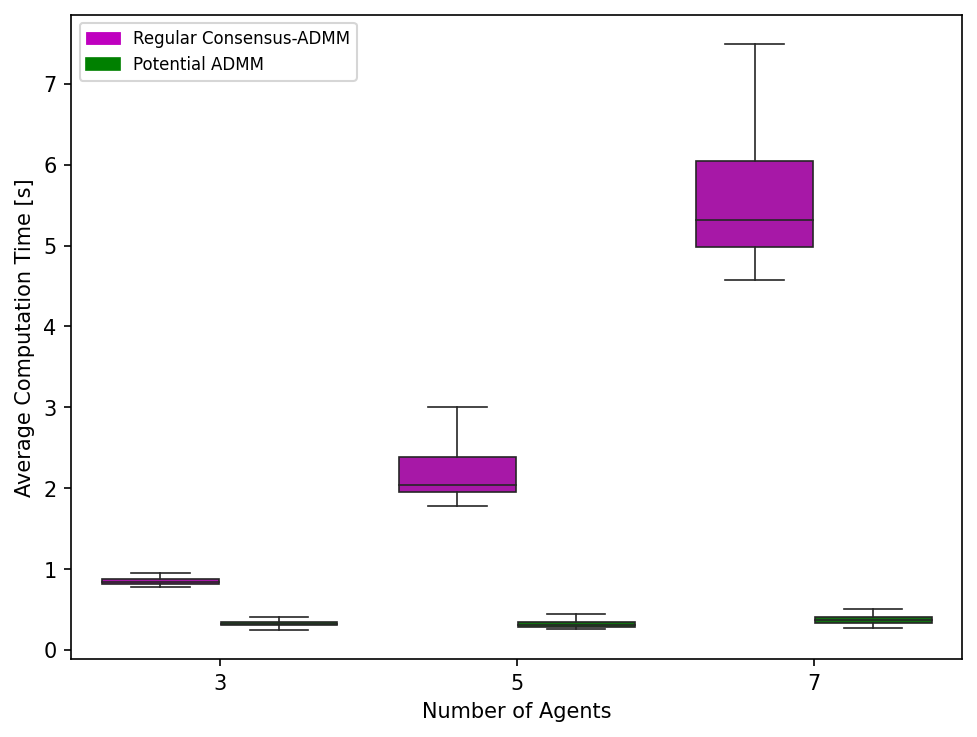

In [38]:
plt.figure(dpi=150)

sns.boxplot(data=drones_3_7_combined, x=" n_agents", y="t_solve_avg", hue='Distributed ADMM', palette=["m", "g"], showfliers=False,linewidth=0.8)
legend =  plt.legend(['Regular Consensus-ADMM','Potential ADMM'],fontsize=8)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('m')
leg.legendHandles[1].set_color('g')
plt.ylabel('Average Computation Time [s]');
plt.xlabel('Number of Agents');
plt.savefig('results/ADMM_avg_computation_time.png')

/tmp/ipykernel_436/3893548614.py:6: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('m')
/tmp/ipykernel_436/3893548614.py:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('g')


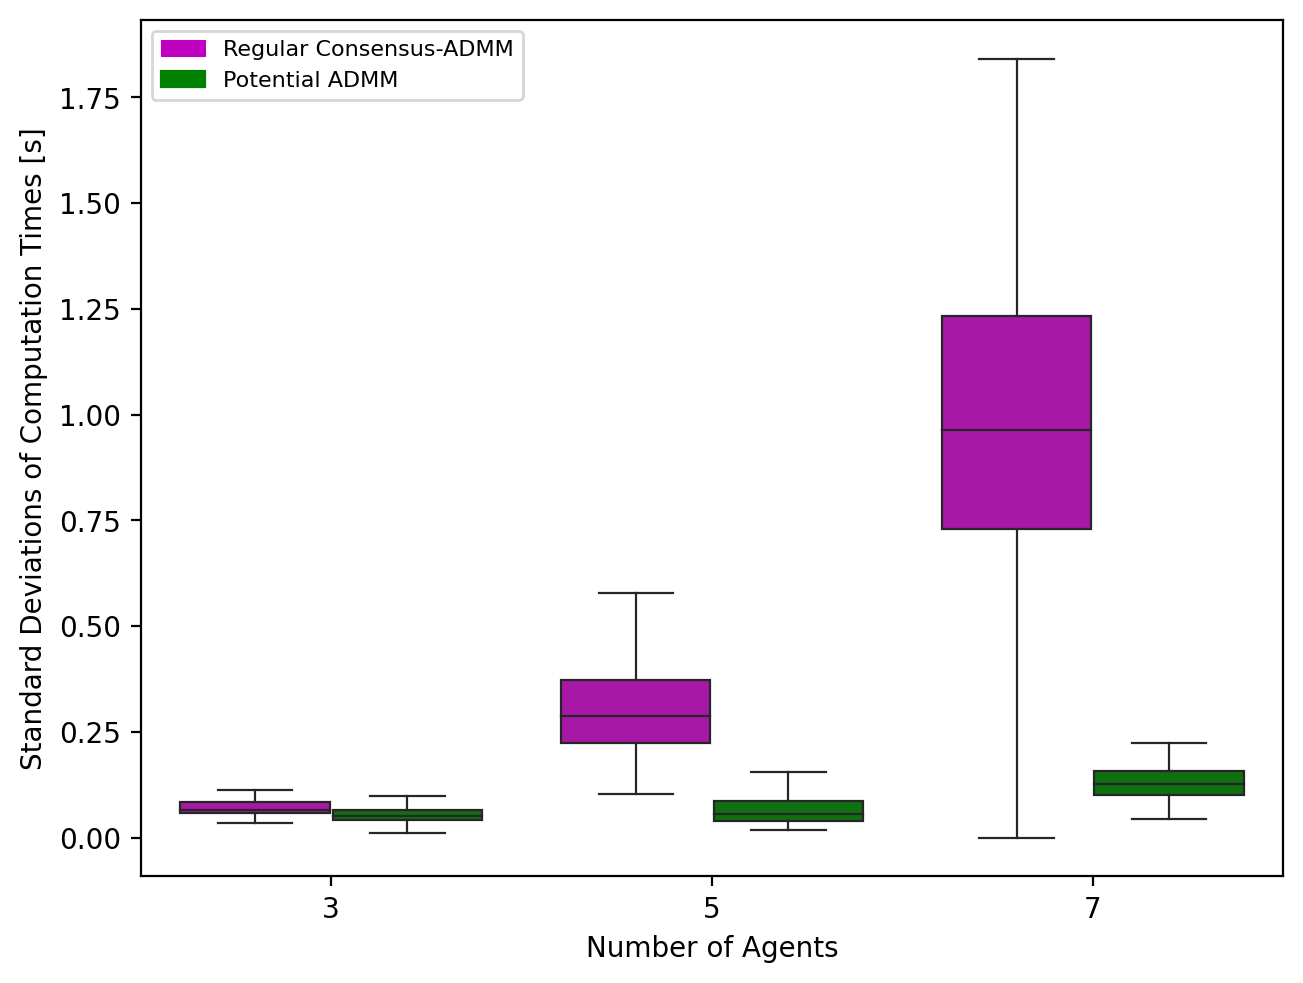

In [40]:
plt.figure(dpi=200)
sns.boxplot(data=drones_3_7_combined, x=" n_agents", y=" t_solve_std", hue='Distributed ADMM', palette=["m", "g"], showfliers=False,linewidth=0.8)
legend =  plt.legend(['Regular Consensus-ADMM','Potential ADMM'],fontsize=8)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('m')
leg.legendHandles[1].set_color('g')
plt.ylabel('Standard Deviations of Computation Times [s]');
plt.xlabel('Number of Agents');
plt.savefig('results/ADMM_avg_std_time.png')

In [142]:
df = drones_3_7_combined

In [143]:
df_try = df.replace(to_replace='None', value=np.nan).dropna()

In [144]:
df_try = df.replace(to_replace=np.inf, value=np.nan).dropna()

In [145]:
optimality_df = df_try.groupby(['Distributed ADMM',' n_agents']).agg({' obj_trj': ['mean', 'var']})

In [146]:
optimality_df

obj_trj              
                                   mean           var
Distributed ADMM  n_agents                           
False            3           897.424173  1.194380e+05
                 5          3388.752639  3.832107e+07
                 7          2438.376893  5.253326e+05
True             3           865.471133  1.343045e+05
                 5          1263.934204  1.697568e+05
                 7          2335.144190  6.770191e+05

In [147]:
optimality_df.columns=['mean_value','var_value']

In [148]:
optimality_df = optimality_df.reset_index()

In [149]:
optimality_df

,Distributed ADMM,n_agents,mean_value,var_value
0,False,3,897.424173,1.194380e+05
1,False,5,3388.752639,3.832107e+07
2,False,7,2438.376893,5.253326e+05
3,True,3,865.471133,1.343045e+05
4,True,5,1263.934204,1.697568e+05
5,True,7,2335.144190,6.770191e+05


In [150]:
centralized_results = optimality_df.loc[optimality_df['Distributed ADMM']==True]

In [151]:
decentralized_results = optimality_df.loc[optimality_df['Distributed ADMM']==False]

In [152]:
centralized_results

,Distributed ADMM,n_agents,mean_value,var_value
3,True,3,865.471133,134304.489391
4,True,5,1263.934204,169756.815683
5,True,7,2335.144190,677019.115595


In [153]:
decentralized_results

,Distributed ADMM,n_agents,mean_value,var_value
0,False,3,897.424173,1.194380e+05
1,False,5,3388.752639,3.832107e+07
2,False,7,2438.376893,5.253326e+05


In [154]:
relative_gap = np.abs(decentralized_results['mean_value'].values - centralized_results['mean_value'].values)/centralized_results['mean_value'].values
relative_gap

array([0.037, 1.681, 0.044])

In [155]:
success_count=df.groupby(['Distributed ADMM',' n_agents'])[' converged'].value_counts()

In [156]:
success_count

Distributed ADMM   n_agents   converged
False             3          True          38
                             False         12
                  5          True          34
                             False         16
                  7          False         31
                             True          19
True              3          True          42
                             False          8
                  5          True          43
                             False          7
                  7          True          28
                             False         22
Name: count, dtype: int64

In [160]:
success_count_df = pd.DataFrame(success_count)

In [161]:
success_count_df=success_count_df.rename(columns={'converged':'count'})

In [165]:
success_count_df = success_count_df.reset_index()

In [169]:
success_count_df

,Distributed ADMM,n_agents,converged,count
0,False,3,True,38
1,False,3,False,12
2,False,5,True,34
3,False,5,False,16
4,False,7,False,31
5,False,7,True,19
6,True,3,True,42
7,True,3,False,8
8,True,5,True,43
9,True,5,False,7


In [170]:
centralized = success_count_df.loc[success_count_df['Distributed ADMM']==False]

In [171]:
distributed = success_count_df.loc[success_count_df['Distributed ADMM']==True]

In [181]:
centralized.loc[centralized[' converged']==True]

,Distributed ADMM,n_agents,converged,count
0,False,3,True,38
2,False,5,True,34
5,False,7,True,19


In [184]:
success_centralized = (38+34+19)/(50*3)

In [185]:
success_centralized

0.6066666666666667

In [186]:
distributed.loc[distributed[' converged']==True]

,Distributed ADMM,n_agents,converged,count
6,True,3,True,42
8,True,5,True,43
10,True,7,True,28


In [187]:
success_decentralized = (42+43+28)/(50*3)

In [188]:
success_decentralized

0.7533333333333333

### Comparison w/ DP-ilQR:

In [52]:
dpilqr_3_to_8_agents = pd.read_excel('dpilqr_3_to_8_Agents.xlsm', sheet_name='Sheet1')

In [53]:
dpilqr_3_to_8_agents.head()

,n_agents,trial,centralized,last,J,horizon,dt,converged,times,dist_to_goal
0,3,0,False,True,561.252990,8,0.1,True,0.023242,"[0.07124665534428853, 0.027163722763951046, 0...."
1,3,1,False,True,933.584800,8,0.1,True,0.051770,"[0.09366098149691533, 0.08010242508551062, 0.0..."
2,3,2,False,True,453.596531,8,0.1,True,0.010628,"[0.06377821295268277, 0.04166296450383314, 0.0..."
3,3,3,False,True,806.756891,8,0.1,True,0.024992,"[0.0790861841727646, 0.05619133784852748, 0.04..."
4,3,4,False,True,1457.068627,8,0.1,True,0.111667,"[0.04551504735202634, 0.01952101851573597, 0.0..."


In [54]:
dpilqr_3_to_8_agents = dpilqr_3_to_8_agents.loc[dpilqr_3_to_8_agents['converged']==True]

In [55]:
dpilqr_objectives = dpilqr_3_to_8_agents['J']

In [61]:
dpilqr_objectives

0        561.252990
1        933.584800
2        453.596531
3        806.756891
4       1457.068627
           ...     
232    60229.681637
233    46841.067731
234     5008.281334
235    37792.587435
236    23642.845375
Name: J, Length: 192, dtype: float64

: 

In [57]:
potential_admm_objectives = df.loc[df['converged']==True]

In [58]:
potential_admm_objectives = potential_admm_objectives['obj_trj']

In [59]:
potential_admm_objectives

0       197.453164
1       197.832783
2       249.896239
3       253.552008
4       232.584638
          ...     
288     664.450063
289     749.108478
290     750.121478
291     767.114496
292    1291.860381
Name: obj_trj, Length: 244, dtype: float64

In [48]:
frame = {'admm_objectives':potential_admm_objectives.values,
         'dpilqr_objectives':dpilqr_objectives.values}

In [49]:
comparison_df = pd.DataFrame(frame)

ValueError: All arrays must be of the same length

In [ ]:
comparison_df

,admm_objectives,dpilqr_objectives
0,197.453164,197.453164
1,197.832783,197.832783
2,249.896239,249.896239
3,253.552008,253.552008
4,232.584638,232.584638
...,...,...
289,749.108478,749.108478
290,750.121478,750.121478
291,767.114496,767.114496
292,1291.860381,1291.860381
